In [1]:
import seaborn as sns
import torch
import sklearn

In [2]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
# 欠損値を含むフィールド
penguins.isnull().any(axis=1).sum()

11

In [5]:
# 欠損行を削除
penguins.dropna(inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


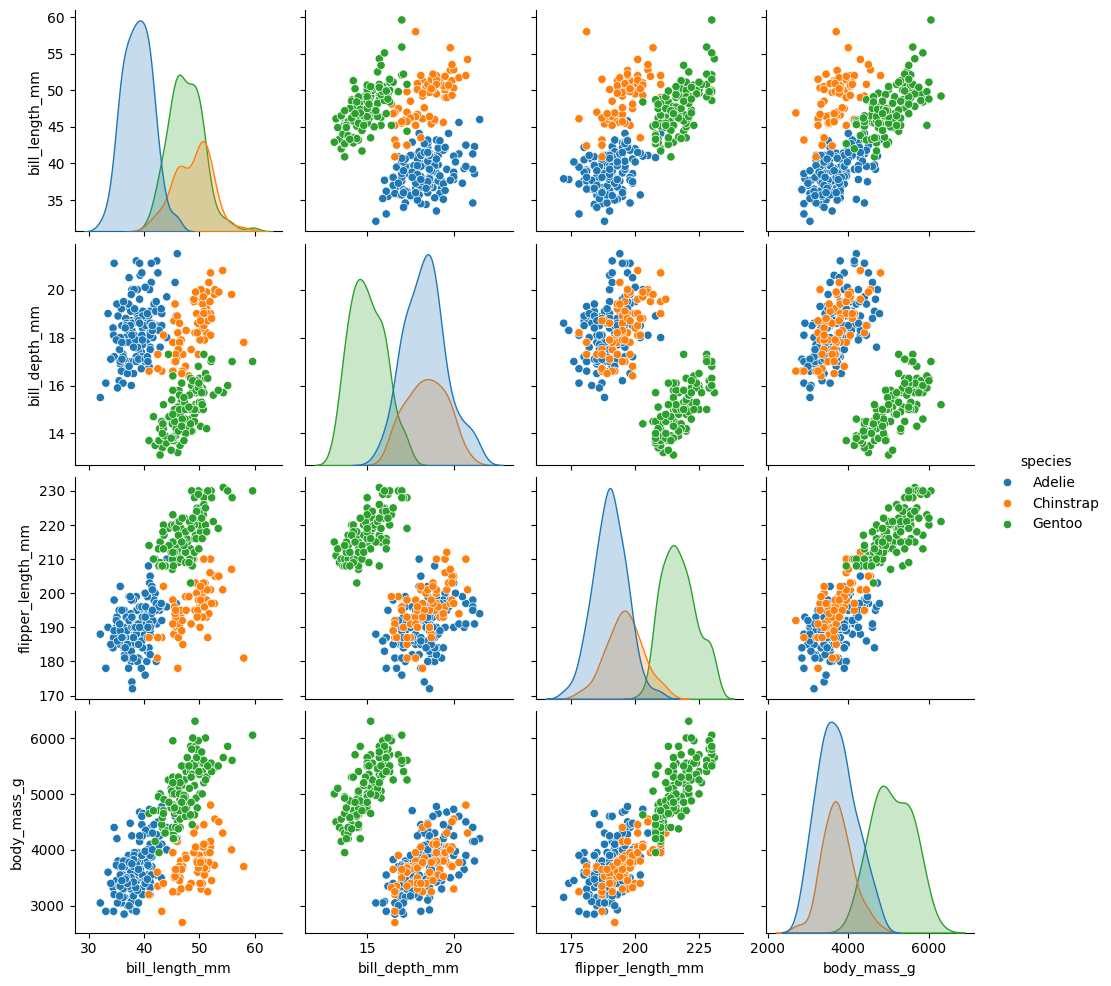

In [6]:
sns.pairplot(penguins, hue="species")

In [7]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
penguins["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
# label encoding
from sklearn.preprocessing import LabelEncoder

cols_label = ["species", "island", "sex"]

for col in cols_label:
    penguins[col] = LabelEncoder().fit_transform(penguins[col])

In [10]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


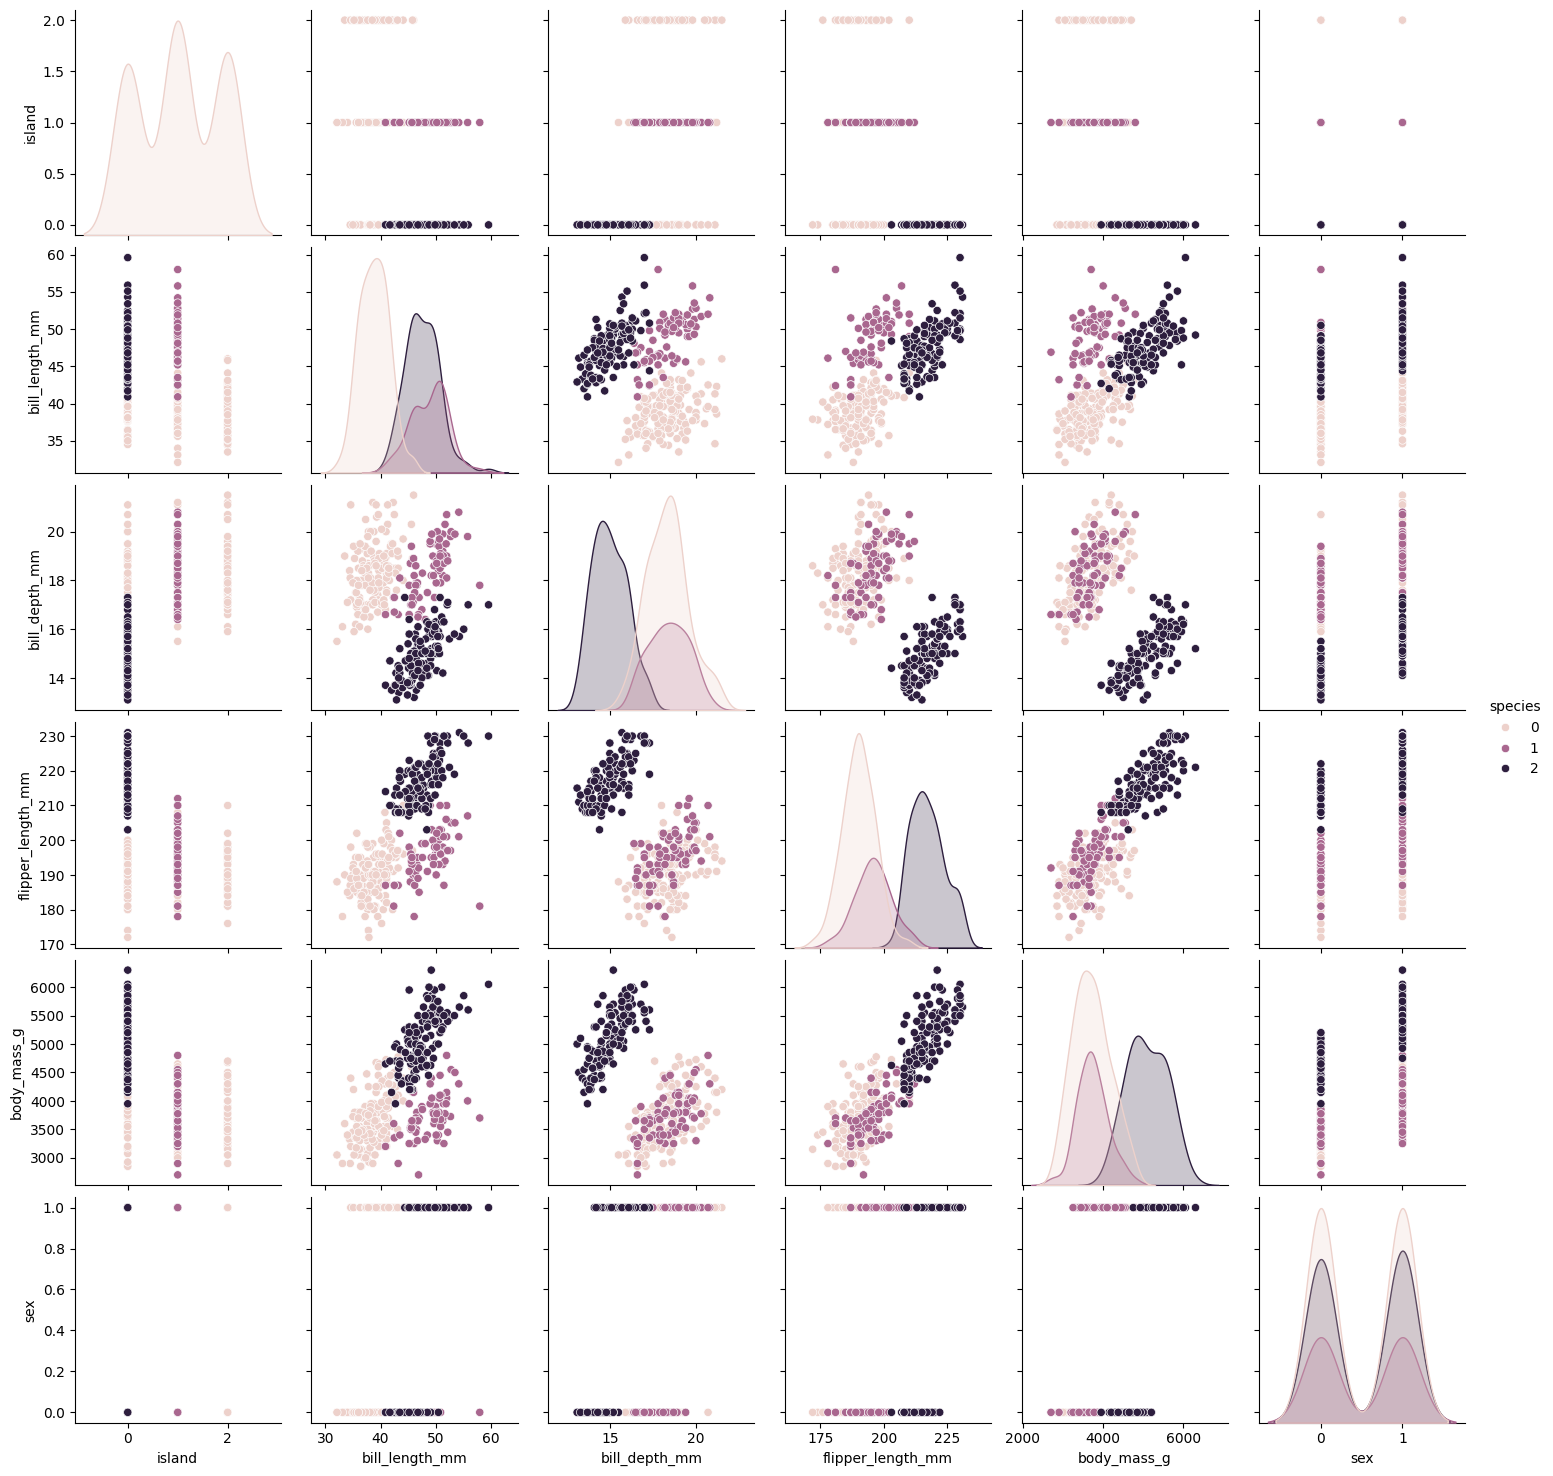

In [11]:
sns.pairplot(penguins, hue="species")

In [12]:
# z-Scoring
from scipy.stats import zscore

zscored_cols = zscore(penguins[[
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
    ]],
    ddof=1) # ddof(不偏分散)

penguins[[
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
    ]] = zscored_cols

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.894695,0.779559,-1.424608,-0.567621,1
1,0,2,-0.821552,0.119404,-1.067867,-0.505525,0
2,0,2,-0.675264,0.424091,-0.425733,-1.188572,0
4,0,2,-1.333559,1.084246,-0.568429,-0.940192,0
5,0,2,-0.858123,1.744400,-0.782474,-0.691811,1
...,...,...,...,...,...,...,...
338,2,0,0.586470,-1.759497,0.929884,0.891616,0
340,2,0,0.513326,-1.454811,1.001232,0.798473,0
341,2,0,1.171621,-0.743875,1.500670,1.916186,1
342,2,0,0.220750,-1.200905,0.787187,1.233139,0


In [13]:
# tensor型に変換
from torch.utils.data import TensorDataset

ds_x = torch.Tensor(penguins.drop(columns="species").to_numpy())
ds_y = torch.Tensor(penguins["species"].to_numpy())

dataset = TensorDataset(ds_x, ds_y)

In [14]:
ds_x.dtype

torch.float32

In [15]:
import torch.utils
import torch.utils.data

batch_size = 32
ds_train, ds_val, ds_test = torch.utils.data.random_split(dataset=dataset, lengths=[233, 50, 50])

In [16]:
from torch.utils.data import DataLoader

In [17]:
ds_train = DataLoader(ds_train, batch_size=batch_size)
ds_val = DataLoader(ds_val, batch_size=batch_size)
ds_test = DataLoader(ds_test, batch_size=batch_size)

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# NeuralNetを定義
class NeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(6, 4) # fc (fully connected layer)
        self.fc2 = nn.Linear(4, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # output 2nd layer
        x = self.fc2(x) # 3クラス以上の確立を出力するとき Softmax処理される
        return x

model = NeuralNetwork().to(device)

In [21]:
model

NeuralNetwork(
  (fc1): Linear(in_features=6, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
)

In [28]:
# 喪失関数(loss function)
loss_fn = nn.CrossEntropyLoss() # E_\theta
optimizer = torch.optim.SGD(model.parameters())

In [29]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        pred = model(x)
        loss = loss_fn(pred, y) # 誤差を計算
        break

        loss.backward()
        optimizer.step() # update parameters
        optimizer.zero_grad()

def val(dataloader, model, loss_fn):
    model.eval()

    val_loss = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            val_loss + loss_fn(pred, y).item()

In [30]:
epochs = 10
for _ in range(epochs):
    train(ds_train, model, loss_fn, optimizer)
    val(ds_val, model, loss_fn)

RuntimeError: expected scalar type Long but found Float